In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

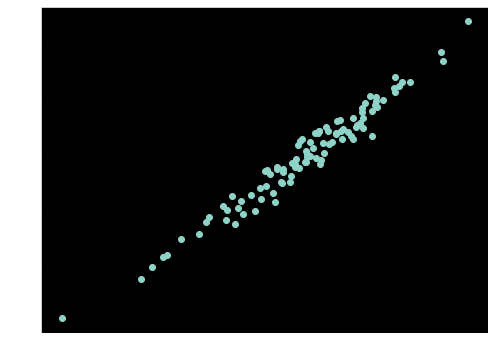

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
X_train_augmented = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_train_augmented

array([[ 1.00000000e+00,  3.61419367e-02],
       [ 1.00000000e+00,  9.84919842e-01],
       [ 1.00000000e+00,  1.82891913e-02],
       [ 1.00000000e+00, -1.22091575e-01],
       [ 1.00000000e+00,  2.15268581e-01],
       [ 1.00000000e+00, -1.19097569e+00],
       [ 1.00000000e+00, -3.12651896e-01],
       [ 1.00000000e+00,  5.65738306e-01],
       [ 1.00000000e+00,  2.00784295e+00],
       [ 1.00000000e+00,  3.07968855e-01],
       [ 1.00000000e+00,  1.15003572e+00],
       [ 1.00000000e+00,  1.39198619e+00],
       [ 1.00000000e+00, -2.02646325e-01],
       [ 1.00000000e+00,  1.64529543e-01],
       [ 1.00000000e+00, -9.74236334e-01],
       [ 1.00000000e+00,  3.95126867e-02],
       [ 1.00000000e+00,  6.31979446e-01],
       [ 1.00000000e+00,  1.04593826e+00],
       [ 1.00000000e+00,  2.11883387e-01],
       [ 1.00000000e+00, -3.56351666e+00],
       [ 1.00000000e+00,  7.67368736e-01],
       [ 1.00000000e+00,  1.43270697e+00],
       [ 1.00000000e+00,  1.93421376e-01],
       [ 1.

In [5]:
X_train_augmented.shape

(80, 2)

In [7]:
import tenseal as ts
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)
context.generate_galois_keys()
context.global_scale = 2**40

In [8]:
X_train_T = X_train_augmented.T

In [9]:
X_train_T

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+0

In [10]:
XTX = np.dot(X_train_T, X_train_augmented)

In [11]:
XTX

array([[80.        ,  1.24955113],
       [ 1.24955113, 82.88460721]])

In [12]:
XTY = np.dot(X_train_T, y_train)

In [13]:
# Client-side code to find weights (including bias)
XTX_inv = np.linalg.inv(XTX)
theta = np.dot(XTX_inv, XTY)

In [14]:
bias = theta[0]
weights = theta[1:]

In [15]:
bias

0.9201288375788544

In [16]:
weights

array([87.40661752])

In [17]:
weights=np.array(weights)
enc_predictions=[]
for i in X_test:
    t=i.dot(weights)
    t=t+bias
    enc_predictions.append(t)

enc_predictions

[22.578806866135803,
 -54.71623765730702,
 41.51109117383098,
 87.62277541575803,
 -195.1053771770655,
 49.29435204981529,
 -77.49731107793596,
 11.82086628773718,
 26.18867755174756,
 7.580477067063941,
 -80.04062767401052,
 62.51737490770025,
 78.46404064146887,
 62.47433598931833,
 -29.214702305240497,
 42.12668188074818,
 91.28115406285815,
 -121.62161355576421,
 116.39350207621962,
 74.42986290946628]

In [18]:
for a,b in zip(y_test,enc_predictions):
    print(a,b)

-6.400439740897028 22.578806866135803
-75.83288846408419 -54.71623765730702
43.02438482670904 41.51109117383098
81.72162477765585 87.62277541575803
-197.9801503584435 -195.1053771770655
32.09705138165424 49.29435204981529
-102.66748011552487 -77.49731107793596
15.35071412820563 11.82086628773718
6.892323119468568 26.18867755174756
26.28851287900197 7.580477067063941
-80.36899984455164 -80.04062767401052
30.84591703151775 62.51737490770025
95.06862969774186 78.46404064146887
69.43879729019481 62.47433598931833
-45.80868282540775 -29.214702305240497
63.18804079600157 42.12668188074818
91.41603362148403 91.28115406285815
-108.37740214379002 -121.62161355576421
142.75464960351508 116.39350207621962
87.77205622112535 74.42986290946628


In [20]:
def mse(y_test, enc_predictions):
    return np.mean((y_test-enc_predictions)**2)

mse = mse(y_test, enc_predictions)
print(mse)

304.49348330785404


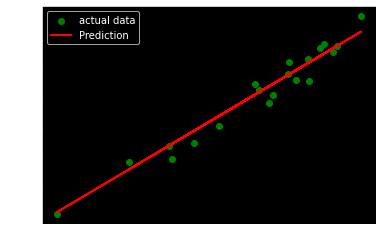

In [21]:
plt.scatter(X_test,y_test,color='green',label='actual data')
plt.plot(X_test,enc_predictions,color='red',linewidth=2,label='Prediction')
plt.legend()
plt.show()